# Példa 7.12

Határozzuk meg az alábbi keretnél a hajlítónyomatéki igénybevétel eloszlását! Mekkora a maximális (abszolút értelemben) hajlítónyomaték, és hol ébred? Hol lesz a hajlítónyomaték zérus értékű? A tartó anyaga és keresztmetszete végig állandó.

<img src="Fig_7.12.png" style="width: 200px;">

# Megoldás

Betöltjük a `sympy` modult. Definiáljuk a szimbólumokat.

In [1]:
import sympy as sp
sp.init_printing()

F, M_B, R, γ, I, E, A = sp.symbols("F, M_B, R, γ, I, E, A") #γ: \gamma + tab

A feladat megoldását egyszerűbbé tehetjük a szimmetriák kihasználásával.
<img src="Fig_7.12c.png" style="width: 300px;">

Az igénybevételi függvények:

$$N(\gamma)=\frac{F}{2}\sin \gamma,$$

$$M_h(\gamma)=-\frac{F}{2}R\sin \gamma+M_B.$$

"Vigyük be" $N(\gamma)$-t és $M_h(\gamma)$-t a programkódba, és ott számoljunk tovább, többek közt a parciális deriváltjaikat.

In [2]:
Nγ = F/2*sp.sin(γ)
Mhγ = -F/2*R*sp.sin(γ)+M_B

#parciális deriváltak:
parcderNγ = Nγ.diff(M_B)
display(parcderNγ)

In [3]:
parcderMhγ = Mhγ.diff(M_B)
display(parcderMhγ)

B-ben a szögelfordulás 0, így a következő egyenletek írhatók fel:

$$\begin{align}\varphi_B &= 0,\\
U&=U_{M_h}+U_N,\\
\frac{\partial U}{\partial M_B}&=0,\\
\frac{\partial U}{\partial M_B}&=\frac{\partial U_{M_h}}{\partial M_B}+\frac{\partial U_N}{\partial M_B}, \\
\frac{\partial U_{M_h}}{\partial M_B}&=\frac{1}{IE}\int_0^{\pi/2}M_h \frac{\partial M_h}{\partial M_B}R \mathrm{d} \gamma,\\
\frac{\partial U_N}{\partial M_B}&=\frac{1}{AE}\int_0^{\pi/2}N \frac{\partial N}{\partial M_B}R \mathrm{d} \gamma.\end{align}$$

Most írjuk be $\frac{\partial U_{M_h}}{\partial M_B}$-t és $\frac{\partial U_N}{\partial M_B}$-t.

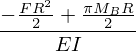

In [4]:
parcderUMh = 1/E/I*sp.integrate(Mhγ*parcderMhγ*R,(γ,0,sp.pi/2))
display(parcderUMh)
parcderUN = 1/A/E*sp.integrate(Nγ*parcderNγ*R,(γ,0,sp.pi/2))
parcderUN #mivel N(γ) parciális deriváltja 0, az integrál is 0 lesz

Most már felírhatjuk a $$\frac{\partial U}{\partial M_B}=\frac{\partial U_{M_h}}{\partial M_B}+\frac{\partial U_N}{\partial M_B}=0$$ egyenletet is és megoldhatjuk $M_B$-re.

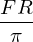

In [5]:
parcderU = parcderUMh+parcderUN
MBsol = sp.solve(parcderU,M_B)
MBsol = MBsol[0] #kiszedjük a megoldást az 1 elemű listából
MBsol

Ez alapján ábrázolhatjuk a hajlítónyomatéki függvényt. Ehhez először be kell helyettesítenünk az $M_B$-re kapott kifejezést a korábbi kifejezésbe.

In [6]:
Mhγsubs = Mhγ.subs(M_B,MBsol)
Mhγsubs

Betöltjük a `matplotlib`-et és a `linspace`-t az ábrázoláshoz.

In [7]:
import matplotlib.pyplot as plt
from numpy import linspace

Láthatjuk, hogy a $\gamma$ koordinátán kívül $R$ és $F$ is benne marad az igénybevételi függvény kifejezésében. Mivel plotolni csak konkrét számokkal tudunk, ezért ezeknek szükséges valamilyen önkényes (de fizikailag értelmes) értéket adnunk. Ez nem befolyásolja az ábrák jelleghelyességét. Itt most $R=1 \, \rm{m}$-t és $F=1\,\rm{N}$-t választunk.

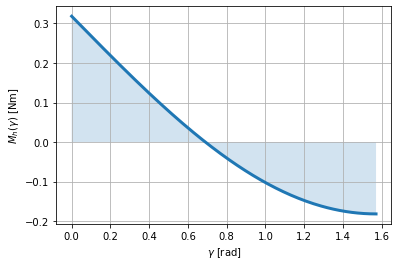

In [8]:
R_val = 1
F_val = 1

γs = linspace(0,float(sp.pi/2),201) #felveszünk 201 pontot a 0 - π/2 távolságon
Mh_konkret = Mhγsubs.subs([(R,R_val),(F,F_val)]) #behelyttesítjük R=1 és F=1-t
display(Mh_konkret)

Mhs = [float(Mh_konkret.subs(γ,γi)) for γi in γs] #kiszámoljuk V(x) értékeit az adott x értékeken, 
                                                  #és egyből 'float'-tá alakítjuk őket
plt.plot(γs, Mhs, lw = 3) # Az Mh(γ) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw).
plt.fill_between(γs, Mhs, alpha=0.2) #Kiszínezi a függvény alatti területet
plt.xlabel("$\gamma$ [rad]") #x tengelyhez tartozó tengelyfelirat
plt.ylabel("$M_h(\gamma)$ [Nm]") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács
plt.show() #kirajzolás

Az ábrán láthatjuk, hogy hajlító igénybevétel maximuma $\gamma=0$-nál van, azaz a B pontban. Ahhoz, hogy megtaláljuk a hajlítónyomaték zérushelyét, használhatjuk a `solve`-ot.

In [9]:
γ0 = sp.solve(Mhγsubs,γ)
γ0 = γ0[0] #kiszedjük az eredményt a listából
γ0 = γ0*180/sp.pi #átváltás fokba
γ0.evalf(5) #fok

Láthatjuk, hogy a `solve` által adott gyök kívül esik az általunk vizsgált tartományon. Kihasználva a szinusz azonosságait, megkaphatjuk a keresett megoldást.

In [10]:
γ0 = 180-γ0
γ0.evalf(5) #fok